In [1]:
#subdivide time into short intervals of the same duration (dt). r = 20 
#generate a sequence of random numbers (x[i]) uniformly distributed between 0 and 1
#if x[i] is greater than rst there will be a spike
# maybe set dt equal to 1 millisecond
# simulation time should be 1000ms and frequency is 20HZ (there should be 20 spikes)

#Goal: Create list of spikes and spike times via Poisson Process

import numpy as np
import matplotlib.pyplot as plt
import random 
import pandas as pd

dt = 1 #1 ms = 0.001ms- maybe decrease (given by poisson article)
r = 0.03 #constant (spikes/ms) asked for frequency of 20Hz
counter = 0 #counting number of spikes
time = 1000 #ms
timeVector = np.arange(0, time, dt) #creating time vector of intervals of size dt
spikeVector = np.zeros(len(timeVector)) #holding 1s for spike and 0 for no spike at given interval\

xVector = np.random.uniform(0,1, size = len(timeVector)) #same length as timeVector to store uniform values between 0 and 1



In [2]:
#Poisson Process

#if xVector[i] (an instance of a uniform value) is greater than rst there will be a spike
counter = 0 # reset counter
for i in range(len(xVector)):
    
    if xVector[i] <= r * dt: 
        spikeVector[i] = 1 #add 1 to spikeVector if there's a spike
        counter += 1
        

In [3]:
print(counter) #number of spikes

27


In [4]:
spike_time_Vector = np.zeros(counter)   #create vector of spike times equal to length of spike count
z = 0 #initialize z to begin at index 0

for y in range(len(spikeVector)): #grab index of spike and compare to timeVector

    if spikeVector[y] == 1:
        temp_index = y
        spike_time_Vector[z] = timeVector[y] #add spike times in this vector 
        z = z + 1

In [5]:
#Calculate ISI
isi_vec = np.diff(spike_time_Vector)

print("The average isi is:")
print(np.mean(isi_vec)) #ms

print("The std is:")
print(np.std(isi_vec)) #ms



The average isi is:
34.30769230769231
The std is:
31.667465992195584


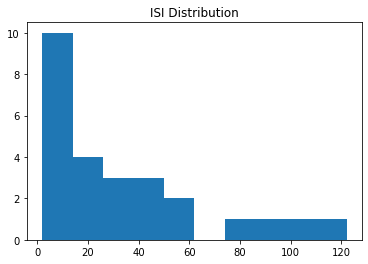

In [6]:
#Check that the time between spikes (ISI) is exponentially distributed – the mean(ISI) = std(ISI). 

plt.hist(isi_vec)

plt.title('ISI Distribution')


plt.show()

In [7]:
##Part 2: Conductance Figure

##Goal: Compute and Plot Excitatory Conductance

Se = 1 #strength of spike
j = 5 #ms time to decay

geVector = np.zeros(len(timeVector)) #excitatory conductance (amount spike jumps)

for i in range(1, time, dt):
    if spikeVector[i] == 1:
        
        geVector[i] = 1
        
    else:
        geVector[i] = geVector[i-1] * np.exp(-dt/j)

In [8]:
yVector = np.zeros(len(spike_time_Vector)) #list of 0s to use as y axis in below plot

Text(0.5, 1.0, 'Excitatory Conductance')

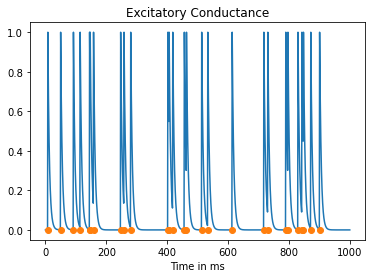

In [9]:
#Excitatory Conductance Plot

# This sets the new plot object
plt.figure()

# This plots the voltage (y-axis) as a function of time (x-axis)
plt.plot(timeVector, geVector)

plt.plot(spike_time_Vector, yVector, marker = 'o', linestyle = 'none')


# This labels the x-axis
plt.xlabel('Time in ms')

# This sets the title
plt.title('Excitatory Conductance')

